### O desafio era escolher uma matriz de confusão arbitrária para a base dos cálculos das métricas. Eu decidi criar a minha prórpria  matriz a partir da simulação de dados reais de Interrupções de Energia Elétrica da ANEEL. Dessa forma, algumas etapas/técnicas anteriores foram feitas para chegar no resultado final.


In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
#Decidi utilizar apenas uma porção do dataset, pois possuia muitos dados
sample_size = 50000
df = pd.read_csv('/content/interrupcoes-energia-eletrica-2025.csv', sep=',', encoding='utf-8', nrows=sample_size)

In [ ]:
df.head()

,_id,DatGeracaoConjuntoDados,IdeConjuntoUnidadeConsumidora,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,NumOrdemInterrupcao,DscTipoInterrupcao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,NumAno,NomAgenteRegulado,SigAgente,NumCPFCNPJ
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Informado,Não Informado,Não Informado
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não Encontrado,Não Encontrado,Não Encontrado
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não se Aplica,Não se Aplica,Não se Aplica
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EDUARDO JOSEF REINHOFER,EDUARDO JOSEF REINHO,37121669900
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMI POWER AMAZONAS LTDA,CMI,02111488000150


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18761 entries, 0 to 18760
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _id                            18761 non-null  int64  
 1   DatGeracaoConjuntoDados        18735 non-null  object 
 2   IdeConjuntoUnidadeConsumidora  18735 non-null  float64
 3   DscConjuntoUnidadeConsumidora  18735 non-null  object 
 4   DscAlimentadorSubestacao       18735 non-null  object 
 5   DscSubestacaoDistribuicao      18735 non-null  object 
 6   NumOrdemInterrupcao            18735 non-null  object 
 7   DscTipoInterrupcao             18735 non-null  object 
 8   IdeMotivoInterrupcao           18735 non-null  float64
 9   DatInicioInterrupcao           18735 non-null  object 
 10  DatFimInterrupcao              18735 non-null  object 
 11  DscFatoGeradorInterrupcao      18735 non-null  object 
 12  NumNivelTensao                 18735 non-null 

In [5]:
df['DscTipoInterrupcao'].value_counts()

,count
DscTipoInterrupcao,
Não Programada,18015
Programada,720


In [6]:
df['IdeMotivoInterrupcao'].value_counts()

,count
IdeMotivoInterrupcao,
0.0,15958
1.0,2263
8.0,237
6.0,222
3.0,34
4.0,21


In [7]:
df['NomAgenteRegulado'].value_counts()

,count
NomAgenteRegulado,
ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,18734
Não Informado,1
Não se Aplica,1
Não Encontrado,1
CMI POWER AMAZONAS LTDA,1
BANAKOBA LTDA,1
SAMARCO MINERACAO S.A. EM RECUPERACAO JUDICIAL,1
SONORA ESTANCIA S/A,1
Papel Simão - Papel e Celulose Catarinense S/A,1


In [8]:
# Pré-processamento dos dados
colunas_interesse = ['DscTipoInterrupcao', 'IdeMotivoInterrupcao', 'DscFatoGeradorInterrupcao', 'NomAgenteRegulado']
df_reduzido = df[colunas_interesse].copy()

In [9]:
# Remover linhas com valores nulos ou vazios na coluna de tipo de interrupção
df_reduzido = df_reduzido.dropna(subset=['DscTipoInterrupcao'])
df_reduzido = df_reduzido[df_reduzido['DscTipoInterrupcao'] != '']

In [10]:
# Verificar a distribuição dos tipos de interrupção após a limpeza
contagem_tipos = df_reduzido['DscTipoInterrupcao'].value_counts()
print(f"\nDistribuição dos tipos de interrupção após limpeza:\n{contagem_tipos}")


Distribuição dos tipos de interrupção após limpeza:
DscTipoInterrupcao
Não Programada    18015
Programada          720
Name: count, dtype: int64


In [11]:
# Codificar as categorias para valores numéricos
le = LabelEncoder()
df_reduzido['TipoInterrupcao_encoded'] = le.fit_transform(df_reduzido['DscTipoInterrupcao'])

In [13]:
# Simular previsões de um modelo (80% de acerto, 20% de erro)
#Uma ideia que tive durante as aulas de simulação e métodos estocáticos
np.random.seed(42)  # Fixando a semente aleatória
y_true = df_reduzido['TipoInterrupcao_encoded'].values

In [14]:
# Criar previsões simuladas
y_pred = y_true.copy()
n_erros = int(len(y_true) * 0.2)  # 20% de erro
indices_erro = np.random.choice(len(y_true), n_erros, replace=False)


In [15]:
# Para os índices selecionados, atribuir uma previsão errada (valor aleatório diferente do real)
for i in indices_erro:
    valores_possiveis = [v for v in np.unique(y_true) if v != y_true[i]]
    if valores_possiveis:
        y_pred[i] = np.random.choice(valores_possiveis)

In [16]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

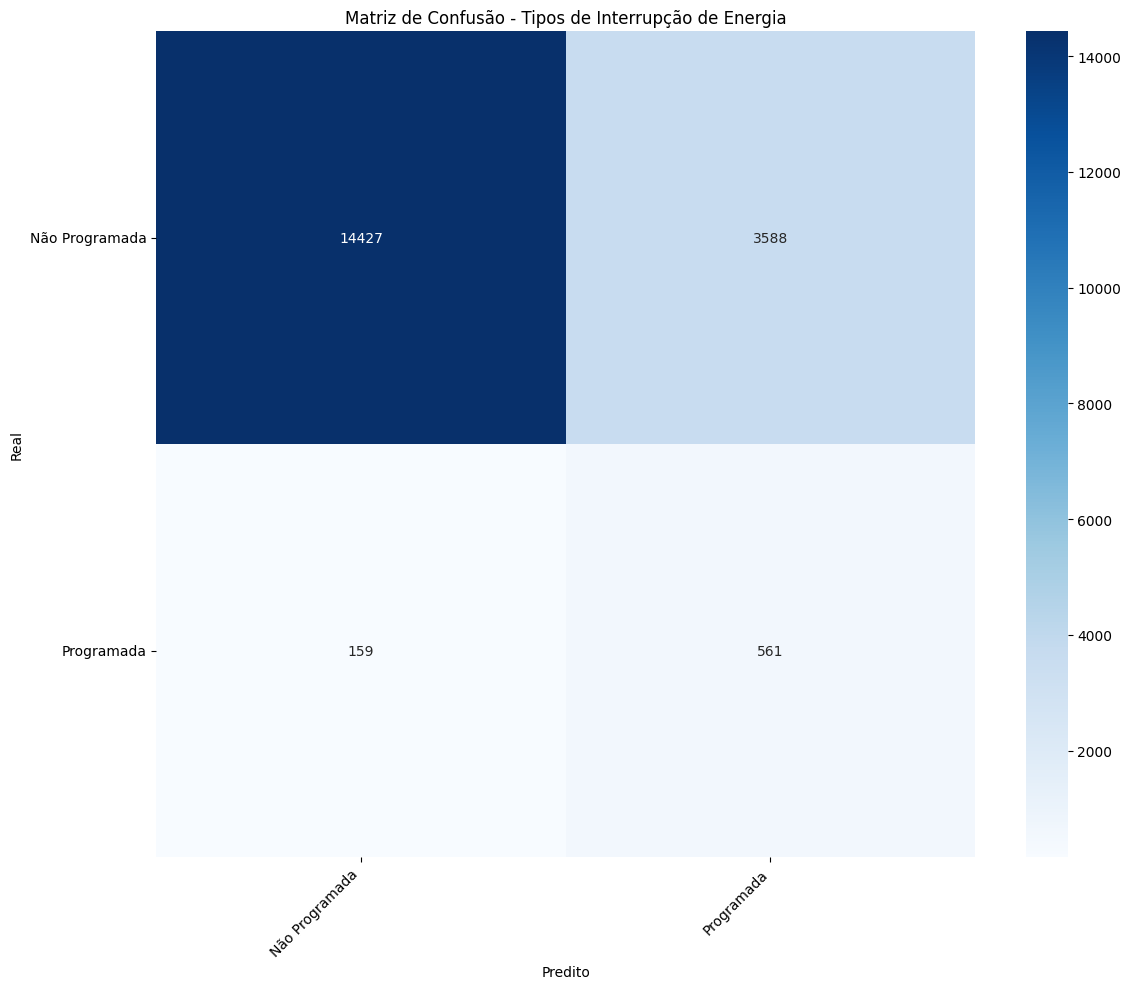

In [17]:
# Visualizar a matriz de confusão
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Tipos de Interrupção de Energia')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
# Calcular e exibir métricas de avaliação
print("\nRelatório de Classificação:")
print(classification_report(y_true, y_pred, target_names=le.classes_))


Relatório de Classificação:
                precision    recall  f1-score   support

Não Programada       0.99      0.80      0.89     18015
    Programada       0.14      0.78      0.23       720

      accuracy                           0.80     18735
     macro avg       0.56      0.79      0.56     18735
  weighted avg       0.96      0.80      0.86     18735



In [19]:
# Função para calcular métricas detalhadas
def calcular_metricas_detalhadas(cm, classes):
    metricas = {}
    for i, classe in enumerate(classes):
        VP = cm[i, i]
        FP = cm[:, i].sum() - VP
        FN = cm[i, :].sum() - VP
        VN = cm.sum() - (VP + FP + FN)

        sensibilidade = VP / (VP + FN) if (VP + FN) > 0 else 0
        especificidade = VN / (VN + FP) if (VN + FP) > 0 else 0
        precisao = VP / (VP + FP) if (VP + FP) > 0 else 0
        f1 = 2 * (precisao * sensibilidade) / (precisao + sensibilidade) if (precisao + sensibilidade) > 0 else 0

        metricas[classe] = {
            'Verdadeiros Positivos (VP)': VP,
            'Falsos Positivos (FP)': FP,
            'Falsos Negativos (FN)': FN,
            'Verdadeiros Negativos (VN)': VN,
            'Sensibilidade (Recall)': sensibilidade,
            'Especificidade': especificidade,
            'Precisão': precisao,
            'F1-Score': f1
        }

    acuracia = np.trace(cm) / np.sum(cm)
    metricas['Global'] = {'Acurácia': acuracia}
    return metricas

In [20]:
# Calcular métricas detalhadas
metricas_detalhadas = calcular_metricas_detalhadas(cm, le.classes_)

print("\nMétricas Detalhadas por Classe:")
for classe, metrica in metricas_detalhadas.items():
    if classe != 'Global':
        print(f"\n--- {classe} ---")
        for nome, valor in metrica.items():
            if isinstance(valor, (int, np.integer)):
                print(f"{nome}: {valor}")
            else:
                print(f"{nome}: {valor:.4f}")

print(f"\nAcurácia Global: {metricas_detalhadas['Global']['Acurácia']:.4f}")



Métricas Detalhadas por Classe:

--- Não Programada ---
Verdadeiros Positivos (VP): 14427
Falsos Positivos (FP): 159
Falsos Negativos (FN): 3588
Verdadeiros Negativos (VN): 561
Sensibilidade (Recall): 0.8008
Especificidade: 0.7792
Precisão: 0.9891
F1-Score: 0.8851

--- Programada ---
Verdadeiros Positivos (VP): 561
Falsos Positivos (FP): 3588
Falsos Negativos (FN): 159
Verdadeiros Negativos (VN): 14427
Sensibilidade (Recall): 0.7792
Especificidade: 0.8008
Precisão: 0.1352
F1-Score: 0.2304

Acurácia Global: 0.8000
